In [1]:
import numpy as np
import pylab as plt
from scipy import stats

In [2]:
goal = 50                   #kWh, goal for the system to reach
s_avg_cc = 0.3              # as decimal percentage of sky, average cloud cover
s_std_cc = 0.1              # as decimal percentage of sky, standard deviation cloud cover
s_irr = 7                   # kj/m2, solar irradiance
s_area = 100                # m2, solar panel area
ng_power = 70               # kW, natural gas power generation
ng_avg_uptime = 0.95        # as decimal percentage of an hour, average up-time of equipment
ng_std_uptime = 0.01        # as decimal percentage of an hour, standard deviation up-time of equipment
ng_emissions_per_kWh = 0.4127691    # emissions per kWh when an ng turbine is running
ng_startup_time = 4         # hours, time to start-up natural gas turbine
ng_shutdown_time = 2        # hours, time to shutdown natural gas turbine
reward_function = [0,50,100]

In [3]:
# Create Simulation
def simulation(actions):
    reward = []
    for idx, ng_on in enumerate(actions):
        s_kWh = (s_irr * stats.norm.pdf((idx-12)/2.738612788, 0, 1) / \
                stats.norm.pdf((12-12)/2.738612788, 0, 1) ) * \
                (1-np.random.normal(s_avg_cc, s_std_cc, 1)[0]) * s_area
        ng_kWh = ng_on * np.random.normal(ng_avg_uptime, ng_std_uptime,1)[0] * ng_power
        ng_emissions = ng_kWh * ng_emissions_per_kWh
        if s_kWh >= goal and ng_emissions < 1:
            r = reward_function[2]
        elif s_kWh + ng_kWh >= goal:
            r = reward_function[1]
        else:
            r = reward_function[0]
        reward.append(r)
    return reward

# Test Simulation
actions_guess = np.ones(24)
actions_guess *= -1
for i in range(24):
        actions_guess[i] = round(np.random.uniform(0,1),0)
        
actions_guess = [int(a) for a in actions_guess]
rewards = simulation(actions_guess)
print(rewards)

[50, 0, 0, 50, 0, 0, 0, 100, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 50, 50, 0, 50, 0, 0]


In [4]:
%%time

import itertools
state_space = list(itertools.product([0, 1], repeat=24))
len(state_space)

Wall time: 3.27 s


16777216

In [5]:
%%time

# takes 29 minutes to run

indexes = []
b = (1,0,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0,0,0,1)")
b = (1,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0,0,1)")
b = (1,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (1,0,1)")
b = (0,1,0)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[i:i+len(b)] == b:
            indexes.append(idx)

print("finished (0,1,0)")
b = (0,0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (0,0,0,1)")
b = (0,0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)

print("finished (0,0,1)")
b = (0,1)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)
            
print("finished (0,1)")
b = (1,0)
for idx, states in enumerate(state_space):
    for i in range(len(states)):
        if states[0:i+len(b)] == b:
            indexes.append(idx)

print("finished (1,0)")
indexes.sort()
indexes = set(indexes)
indexes = list(indexes)
print('number of invalid states:',len(indexes))
for i in reversed(indexes):
    state_space.pop(i)
    
print('number of valid states',len(state_space))
#state_space

finished (1,0,0,0,1)
finished (1,0,0,1)
finished (1,0,1)
finished (0,1,0)
finished (0,0,0,1)
finished (0,0,1)
finished (0,1)
finished (1,0)
number of invalid states: 16768878
number of valid states 8338
Wall time: 15min 57s


In [6]:
goal_mapping = []
for i in state_space:
    goal_mapping.append(simulation(i))
    
#goal_mapping

In [7]:
%%time
reward_matrix = []
num_iterations = 3
for i in range(num_iterations):
    reward = []
    for state in state_space:
        reward.append(round(sum(simulation(state)),1))

    reward_matrix.append(reward)

print(np.array(reward_matrix).shape)
print('average winner was:',np.argmax(np.average(reward_matrix,axis=0)),\
      'with simulation:',state_space[np.argmax(np.average(reward_matrix,axis=0))])
for i in range(len(reward_matrix)):
    print('round '+str(i+1),'winner was:',np.argmax(reward_matrix[i]),\
          'with simulation:',state_space[np.argmax(reward_matrix[i])])

(3, 8338)
average winner was: 7622 with simulation: (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 1 winner was: 7622 with simulation: (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1)
round 2 winner was: 7272 with simulation: (1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1)
round 3 winner was: 7265 with simulation: (1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
Wall time: 1min 18s


In [8]:
node_counter = 0
state_lookup = {}
for j in range(1,25):
    for i in state_space:
        if 'level'+str(j)+'_'+str(i[:j]) not in state_lookup:
            state_lookup['level'+str(j)+'_'+str(i[:j])] = node_counter
            node_counter += 1


states = []
for i in state_space:
    available_actions = []
    for j in range(1,25):
        available_actions.append(state_lookup['level'+str(j)+'_'+str(i[:j])])
    
    states.append(available_actions)


available_actions = []
term_nodes = [17924]
           
for i in states:
    for j in range(1,25):
        if j == 0:
            if (0,i[j]) not in available_actions:
                available_actions.append((0,i[j]))
        elif j == 24:   
            if (node_counter,0) not in available_actions and (node_counter,1) not in available_actions:
                available_actions.append((node_counter,0))
                available_actions.append((node_counter,1))
            else:
                term_nodes.append(i[-1])
        else:
            if (i[j-1],i[j]) not in available_actions:
                available_actions.append((i[j-1],i[j]))
            
#available_actions

In [9]:
points_list = available_actions

In [10]:
# how many points in graph? x points
MATRIX_SIZE = node_counter + 1

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [19]:
# assign zeros to paths and 100 to goal-reaching point
reward = -1
for point in points_list:
    #print(point)
    for idx, term_node in enumerate(term_nodes):
        if point[0] == term_node or point[1] == term_node:
            reward = sum(goal_mapping[idx])
    
    if point[0] in term_nodes:
        R[point] = reward
    else:
        R[point] = 0

    if point[1] in term_nodes:
        R[point[::-1]] = reward
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
for idx, term_node in enumerate(term_nodes):
    R[term_node,term_node]= sum(goal_mapping[idx])

#R

In [12]:
from numba import jit

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast_score(Q): # Function is compiled to machine code when called the first time
    go_fast_score = Q/np.max(Q)*100
    return go_fast_score

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE], dtype=int))

# learning parameter
gamma = 0.8

initial_state = node_counter

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state, action] = int(R[current_state, action] + gamma * max_value)
    #print('max_value', R[current_state, action] + gamma * max_value)
  
    #if (np.max(Q) > 0):
    #    return(np.sum(go_fast_score(Q)))
    #else:
    return(0)

update(initial_state, action, gamma)

0

In [14]:
%%time

# Training
scores = []
for i in range(2000000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    if i % 1000 == 0:
        score = np.sum(go_fast_score(Q))
        scores.append(score)
        #print ('Score:', str(score))
    
print("Trained Q matrix:")
#print(go_fast_score(Q))

Trained Q matrix:
Wall time: 3h 16min 33s


Most efficient path:
[26262, 1, 3, 6, 10, 16, 24, 35, 52, 78, 117, 174, 257, 377, 551, 805, 1178, 1727, 2535, 3722, 5463, 8011, 11740, 17199, 25196]


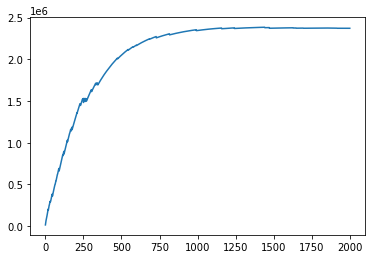

In [15]:
# Testing
current_state = node_counter
steps = [current_state]

while current_state not in term_nodes:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [17]:
%%time

for step in steps:
    for state in state_lookup:
        if state_lookup[state] == step:
            print(state)

level1_(1,)
level2_(1, 1)
level3_(1, 1, 1)
level4_(1, 1, 1, 1)
level5_(1, 1, 1, 1, 1)
level6_(1, 1, 1, 1, 1, 1)
level7_(1, 1, 1, 1, 1, 1, 0)
level8_(1, 1, 1, 1, 1, 1, 0, 0)
level9_(1, 1, 1, 1, 1, 1, 0, 0, 0)
level10_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0)
level11_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
level12_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
level13_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)
level14_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
level15_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level16_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level17_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level18_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level19_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
level20_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
level21_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)
level22_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
level23_(1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 